# Notebook para extração de ROI utilizando yolov5

Adaptado [deste notebook](https://www.kaggle.com/code/olegbaryshnikov/rsna-improved-roi-extraction-yolov5) para rodar no Google Colab.



## Coleta de dados

A coleta foi realizada utilizando a biblioteca do kaggle e um token de acesso.

O token de acesso (arquivo json) deve ser criado seguindo [essas orientações](https://www.kaggle.com/docs/api).

Com a biblioteca do kaggle instalada, o arquivo json deve ser enviado ao notebook, [neste comando](#scrollTo=p7O9-FOljECa).

In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.15-py3-none-any.whl size=99605 sha256=9c49f5b8039d72fc00055b2ae4849c1574655c0701dcd9c75c13603a1d1eebd4
  Stored in directory: /root/.cache/pip/wheels/46/0f/33/40c049c224ee941c2b3a7abb858fc34d93e827f9a833d40f09
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.13
    Uninstalling kaggle-1.5.13:
      Successfully uninstalled kaggle-1.5.13


In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"heberscachetti","key":"ad8b543926457fb5cfa49ed68701a5f3"}'}

In [10]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d paulbacher/rsna-bcd-1024x512-preprocessed
!rm -r /content/rsna-original
!unzip -q /content/rsna-bcd-1024x512-preprocessed.zip -d /content/rsna-original

In [21]:
# !kaggle datasets download -p rsna-breast-cancer-detection -f train.csv
!kaggle competitions download -f train.csv rsna-breast-cancer-detection
!kaggle competitions download -f test.csv rsna-breast-cancer-detection

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
  0% 0.00/239 [00:00<?, ?B/s]
100% 239/239 [00:00<00:00, 788kB/s]


In [42]:
!kaggle datasets download -d remekkinas/rsna-breast-cancer-detection-roi-model -f rsna-roi-003.pt
!unzip -q /content/rsna-roi-003.pt.zip

rsna-roi-003.pt.zip: Skipping, found more recently modified local copy (use --force to force download)


## Improved ROI extraction
This notebook based on [⭐️⭐️ Breast Cancer - ROI (brest) extractor ⭐️⭐️](https://www.kaggle.com/code/remekkinas/breast-cancer-roi-brest-extractor) notebook's [fine-tuned](https://www.kaggle.com/datasets/remekkinas/rsna-breast-cancer-detection-roi-model) extraction model [yolov5](https://github.com/ultralytics/yolov5) to extract better ROI from images.

<div class='alert alert-block alert-success'>
    <h4>1:1 ROI DataSets:</h4>
    <ul>
        <li><a href='https://www.kaggle.com/datasets/olegbaryshnikov/rsna-roi-1024x1024-pngs'><b>ROI 1024x1024 pngs</b></a></li>
        <li><a href='https://www.kaggle.com/datasets/olegbaryshnikov/rsna-roi-768x768-pngs'><b>ROI 768x768 pngs</b></a></li>
        <li><a href='https://www.kaggle.com/datasets/olegbaryshnikov/rsna-roi-512x512-pngs'><b>ROI 512x512 pngs</b></a></li>
    </ul>
</div>    
<div class='alert alert-block alert-success'>
    <h4>1:2 ROI DataSets <span style="color: orange">[Recommended]</span>:</h4>
    <ul>
        <li><a href='https://www.kaggle.com/datasets/olegbaryshnikov/rsna-roi-512x1024-pngs'><b>ROI 512x1024 pngs</b></a></li>
        <li><a href='https://www.kaggle.com/datasets/olegbaryshnikov/rsna-roi-384x768-pngs'><b>ROI 384x768 pngs</b></a></li>
        <li><a href='https://www.kaggle.com/datasets/olegbaryshnikov/rsna-roi-256x512-pngs'><b>ROI 256x512 pngs</b></a></li>
    </ul>
</div>

**Main improvements:**
1. ROIs are cropped from original dcm images and then resized (to lose less data)
2. Image transformations applied to extract ROIs from more images
3. ROI completed to desired aspect ratio to avoid noticeable image stretches
4. Too small ROIs are removed

**Data pipeline:**
1. Extract ROI coordinates from [768x768 png images](https://www.kaggle.com/datasets/theoviel/rsna-breast-cancer-768-pngs) using yolov5
2. For images with unextracted ROI coordinates apply transformations until ROI coordinates will not be extracted
3. Resize ROI coordinates to apply on original size images (dcm)
4. Crop ROI images, resize them to output_size and convert it to png format

**Result on train DS:**
* 54634 images - processed successfully  (was 54601)
* 72 images - detection failed (was 105)


<div class='alert alert-block alert-info'>
    <b>
        1024x1024 ROI extraction (CPU):
        <a href='https://www.kaggle.com/code/olegbaryshnikov/rsna-improved-roi-extraction-yolov5?scriptVersionId=113409846'>[Part1]</a>
        <a href='https://www.kaggle.com/code/olegbaryshnikov/rsna-improved-roi-extraction-yolov5?scriptVersionId=113409854'>[Part2]</a>
        <a href='https://www.kaggle.com/code/olegbaryshnikov/rsna-improved-roi-extraction-yolov5?scriptVersionId=113409869'>[Part3]</a>
        <a href='https://www.kaggle.com/code/olegbaryshnikov/rsna-improved-roi-extraction-yolov5?scriptVersionId=113409875'>[Part4]</a>
    </b>
</div>

<div class='alert alert-block alert-info'>
    <b>
        512x1024 ROI extraction (CPU):
        <a href='https://www.kaggle.com/code/olegbaryshnikov/rsna-improved-roi-extraction-yolov5?scriptVersionId=113822294'>[Part1]</a>
        <a href='https://www.kaggle.com/code/olegbaryshnikov/rsna-improved-roi-extraction-yolov5?scriptVersionId=113822320'>[Part2]</a>
    </b>
</div>

## Imports

In [35]:
!pip install -qU python-gdcm pydicom pylibjpeg
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.9/626.9 kB 10.0 MB/s eta 0:00:00


In [22]:
import os
import math
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

from tqdm.notebook import tqdm
import gc

import glob

#for dcm files
from joblib import Parallel, delayed
import pydicom

#for ROI model
import torch

## Config

* set 'skip_small_ROIs' to True to skip small size ROIs
* set 'skip_unrecognized' to True to skip images with no ROI extracted
* set 'avoid_stretches' to True to avoid noticeable stretches when crop ROIs

In [23]:
Config = {
    'output_dim_x' : 256,
    'output_dim_y' : 512,
    'output_extension' : 'png',
    'skip_small_ROIs': True,
    'skip_unrecognized': True,
    'avoid_stretches': True
}

In [90]:
train_csv_path = '/content/train.csv.zip'
train_images_folder = '/content/rsna-original/train_images'
train_images_folder_png_768 = '/content/rsna-original/train_images'

## Data

<span class="alert alert-block alert-danger"><b>Don't forget to remove/change train_csv slicing size</b></span>

In [71]:
train_csv = pd.read_csv(train_csv_path)[['patient_id','image_id']]
train_csv = train_csv.iloc[20000:20100,:]
train_csv

,patient_id,image_id
20000,3122,1043771362
20001,3122,1180784013
20002,31221,1479926236
20003,31221,2068515186
20004,31221,941591056
...,...,...
20095,31317,1739932499
20096,31317,46185881
20097,31317,1042003486
20098,31323,1347121321


In [72]:
def show_image(img):
    fig=plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='bone')
    plt.show()

In [73]:
def show_image_and_ROI(img,ROI):
    fig=plt.figure(figsize=(5, 5))

    rect = cv2.rectangle(img, (int(ROI['xmin']), int(ROI['ymin'])), (int(ROI['xmax']), int(ROI['ymax'])), (255,0,0), 4)

    plt.imshow(rect, cmap='bone')

    plt.show()

In [74]:
def read_png_img(images_folder, patient_id, image_id):
    img_path = os.path.join(images_folder,f'{patient_id}/{image_id}.png')
    img = cv2.imread(img_path)

    return img

In [75]:
#https://www.kaggle.com/code/theoviel/dicom-resized-png-jpg
def read_dcm_img(images_folder, patient_id, image_id):
    img_path = os.path.join(images_folder, patient_id, f'{image_id}.dcm')

    dicom = pydicom.dcmread(img_path)
    img = dicom.pixel_array

    img = (img - img.min()) / (img.max() - img.min())

    if dicom.PhotometricInterpretation == 'MONOCHROME1':
        img = 1 - img

    img = (img * 255).astype(np.uint8)

    return img

## ROIs Extraction

#### Model preparation

In [76]:
#clone model in hidden folder
os.makedirs('/content/yolov5', exist_ok = True)
# Clone yolov5 repository
!git clone https://github.com/ultralytics/yolov5 /content/yolov5

fatal: destination path '/content/yolov5' already exists and is not an empty directory.


In [77]:
#check hidden folder
!ls /content/yolov5

benchmarks.py	 data	     LICENSE	  README.zh-CN.md   train.py
CITATION.cff	 detect.py   models	  requirements.txt  tutorial.ipynb
classify	 export.py   __pycache__  segment	    utils
CONTRIBUTING.md  hubconf.py  README.md	  setup.cfg	    val.py


In [78]:
#get yolov5 and preserve plt backend
def get_yolo():
    b = plt.get_backend()
    model = torch.hub.load(
        '/content/yolov5/',
        'custom',
        path='rsna-roi-003.pt',
        source='local')
    matplotlib.use(b)
    return model

In [79]:
ROI_model = get_yolo()

YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [80]:
#ROI extraction function
#input: image
#output: (xmin,xmax,ymin,ymax)
def ROI_extraction(model, img,transform=None):
    if(transform):
        img = transform(img)

    #select only best prediction
    prediction = model(img).pandas().xyxy[0].to_dict(orient='records')

    if(len(prediction)==0):
        return None

    prediction = prediction[0]

    result = {key:prediction[key] for key in ['xmin','xmax','ymin','ymax']}

    if(transform):
        result = transform.inverse(result)

    return result

#### Image transformations

In [81]:
class Transformation:
    name = 'No transformations'
    def __init__(self):
        super().__init__()

    def __call__(self, img):
        return img

    def inverse(self, coords):
        return coords

class Vertical_Flip(Transformation):
    name = 'Vertical_Flip'
    def __call__(self, img):
        img = cv2.flip(img, 0)
        return img

    def inverse(self, coords):
        coords['ymin'] = 767-coords['ymax']
        coords['ymax'] = 767-coords['ymin']

        return coords

class Horizontal_Flip(Transformation):
    name = 'Horizontal_Flip'
    def __call__(self, img):
        img = cv2.flip(img, 1)
        return img

    def inverse(self, coords):
        coords['xmin'] = 767-coords['xmax']
        coords['xmax'] = 767-coords['xmin']

        return coords

class Change_Contrast(Transformation):
    def __init__(self, clipLimit=2.0, tileGridSize=(8,8)):
        super().__init__()

        self.name = f'Change_Contrast_{clipLimit}_{tileGridSize}'

        self.clipLimit = clipLimit
        self.tileGridSize = tileGridSize

    #https://stackoverflow.com/questions/39308030/how-do-i-increase-the-contrast-of-an-image-in-python-opencv
    def __call__(self, img):
        lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        l_channel, a, b = cv2.split(lab)

        # Applying CLAHE to L-channel
        # feel free to try different values for the limit and grid size:
        clahe = cv2.createCLAHE(clipLimit=self.clipLimit, tileGridSize=self.tileGridSize)
        cl = clahe.apply(l_channel)

        # merge the CLAHE enhanced L-channel with the a and b channel
        limg = cv2.merge((cl,a,b))

        # Converting image from LAB Color model to BGR color spcae
        img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

        return img

    def inverse(self, coords):

        return coords

class Translation(Transformation):
    def __init__(self, x = 30,y=30):
        super().__init__()

        self.name = f'Translation_{x}_{y}'

        self.x = x
        self.y = y
        self.M = np.float32([[1,0,x],[0,1,y]])

    #https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv
    def __call__(self, img):
        rows,cols,_ = img.shape

        img = cv2.warpAffine(img,self.M,(cols,rows))

        return img

    def inverse(self, coords):
        coords['xmin'] = coords['xmax']+self.x
        coords['xmax'] = coords['xmin']+self.x
        coords['ymin'] = coords['ymax']+self.y
        coords['ymax'] = coords['ymin']+self.y

        coords = {key:np.clip(coords[key],0,767) for key in ['xmin','xmax','ymin','ymax']}
        return coords

In [82]:
%matplotlib inline

In [83]:
#first transformation should return the same image
#apply transformations from less to more significant
transformations = [
    Transformation(),
    Vertical_Flip(),Horizontal_Flip(),
    Change_Contrast(clipLimit=2.0),Change_Contrast(clipLimit=15.0),
    Change_Contrast(clipLimit=2.0, tileGridSize=(128,128)),
    Change_Contrast(clipLimit=30.0),
    Change_Contrast(clipLimit=15.0, tileGridSize=(128,128)),

    Translation(x=0,y=30),Translation(x=0,y=-30),
    Translation(x=-5,y=0),Translation(x=5,y=0),
    Translation(x=0,y=50),Translation(x=0,y=-50),
    Translation(x=-15,y=0),Translation(x=15,y=0),

    Translation(x=0,y=-100),Translation(x=0,y=-150),
    Translation(x=-30,y=0),Translation(x=30,y=0)
]

for data in tqdm(train_csv.iloc[1400:1403,:].itertuples(), total=3):
    img = read_png_img(train_images_folder_png_768, str(data.patient_id), str(data.image_id))

    fig=plt.figure(figsize=(100, 40))

    print('patient_id: ',str(data.patient_id),' image_id: ',str(data.image_id))
    for tr_i,transform in enumerate(transformations):
        img_transformed = transform(img)

        ax = fig.add_subplot(3, math.ceil(len(transformations)/3), tr_i+1)
        ax.title.set_text(transform.name)
        ax.title.set_fontsize(50)
        ax.imshow(img_transformed, cmap='bone')

    plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]

#### ROI extraction

In [84]:
train_csv['ROI'] = None
train_csv

,patient_id,image_id,ROI
20000,3122,1043771362,None
20001,3122,1180784013,None
20002,31221,1479926236,None
20003,31221,2068515186,None
20004,31221,941591056,None
...,...,...,...
20095,31317,1739932499,None
20096,31317,46185881,None
20097,31317,1042003486,None
20098,31323,1347121321,None


In [85]:
for transform in transformations:
    print('\nCurrent transformation: ',transform.name)

    train_csv_to_extract = train_csv[train_csv['ROI'].isnull()]

    for data in tqdm(train_csv_to_extract.itertuples(), total=len(train_csv_to_extract)):
        img = read_png_img(train_images_folder_png_768, str(data.patient_id), str(data.image_id))
        extracted_ROI = ROI_extraction(ROI_model, img, transform)
        train_csv.loc[(train_csv.patient_id == data.patient_id)&(train_csv.image_id == data.image_id),'ROI'] = [extracted_ROI]

    ROI = train_csv[~train_csv['ROI'].isnull()]
    no_ROI = train_csv[train_csv['ROI'].isnull()]

    print('len(ROIs): ',len(ROI))
    print('len(no_ROI_imgs): ',len(no_ROI))

    if(len(no_ROI)==0):
        break


Current transformation:  No transformations


  0%|          | 0/100 [00:00<?, ?it/s]

len(ROIs):  95
len(no_ROI_imgs):  5

Current transformation:  Vertical_Flip


  0%|          | 0/5 [00:00<?, ?it/s]

len(ROIs):  95
len(no_ROI_imgs):  5

Current transformation:  Horizontal_Flip


  0%|          | 0/5 [00:00<?, ?it/s]

len(ROIs):  97
len(no_ROI_imgs):  3

Current transformation:  Change_Contrast_2.0_(8, 8)


  0%|          | 0/3 [00:00<?, ?it/s]

len(ROIs):  97
len(no_ROI_imgs):  3

Current transformation:  Change_Contrast_15.0_(8, 8)


  0%|          | 0/3 [00:00<?, ?it/s]

len(ROIs):  98
len(no_ROI_imgs):  2

Current transformation:  Change_Contrast_2.0_(128, 128)


  0%|          | 0/2 [00:00<?, ?it/s]

len(ROIs):  98
len(no_ROI_imgs):  2

Current transformation:  Change_Contrast_30.0_(8, 8)


  0%|          | 0/2 [00:00<?, ?it/s]

len(ROIs):  99
len(no_ROI_imgs):  1

Current transformation:  Change_Contrast_15.0_(128, 128)


  0%|          | 0/1 [00:00<?, ?it/s]

len(ROIs):  99
len(no_ROI_imgs):  1

Current transformation:  Translation_0_30


  0%|          | 0/1 [00:00<?, ?it/s]

len(ROIs):  99
len(no_ROI_imgs):  1

Current transformation:  Translation_0_-30


  0%|          | 0/1 [00:00<?, ?it/s]

len(ROIs):  99
len(no_ROI_imgs):  1

Current transformation:  Translation_-5_0


  0%|          | 0/1 [00:00<?, ?it/s]

len(ROIs):  99
len(no_ROI_imgs):  1

Current transformation:  Translation_5_0


  0%|          | 0/1 [00:00<?, ?it/s]

len(ROIs):  99
len(no_ROI_imgs):  1

Current transformation:  Translation_0_50


  0%|          | 0/1 [00:00<?, ?it/s]

len(ROIs):  99
len(no_ROI_imgs):  1

Current transformation:  Translation_0_-50


  0%|          | 0/1 [00:00<?, ?it/s]

len(ROIs):  99
len(no_ROI_imgs):  1

Current transformation:  Translation_-15_0


  0%|          | 0/1 [00:00<?, ?it/s]

len(ROIs):  99
len(no_ROI_imgs):  1

Current transformation:  Translation_15_0


  0%|          | 0/1 [00:00<?, ?it/s]

len(ROIs):  100
len(no_ROI_imgs):  0


## Check extracted ROIs

In [86]:
train_csv

,patient_id,image_id,ROI
20000,3122,1043771362,"{'xmin': 4.498583793640137, 'xmax': 487.125793..."
20001,3122,1180784013,"{'xmin': 8.153271675109863, 'xmax': 490.062347..."
20002,31221,1479926236,"{'xmin': 7.976782321929932, 'xmax': 489.918151..."
20003,31221,2068515186,"{'xmin': 0.0, 'xmax': 501.894775390625, 'ymin'..."
20004,31221,941591056,"{'xmin': 0.0, 'xmax': 503.88433837890625, 'ymi..."
...,...,...,...
20095,31317,1739932499,"{'xmin': 7.550244331359863, 'xmax': 490.016296..."
20096,31317,46185881,"{'xmin': 6.990429878234863, 'xmax': 490.506683..."
20097,31317,1042003486,"{'xmin': 8.137036323547363, 'xmax': 493.978698..."
20098,31323,1347121321,"{'xmin': 7.2012939453125, 'xmax': 493.13739013..."


  0%|          | 0/5 [00:00<?, ?it/s]

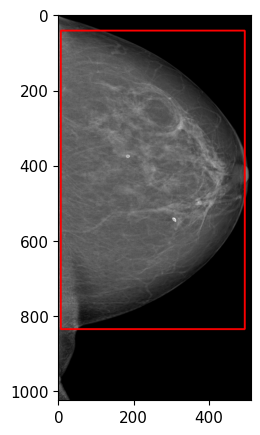

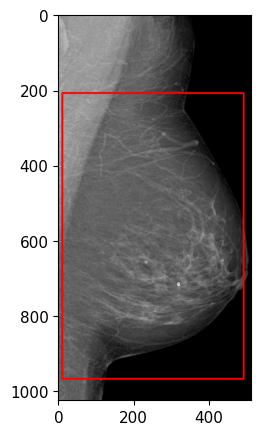

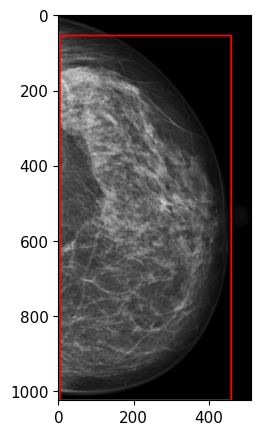

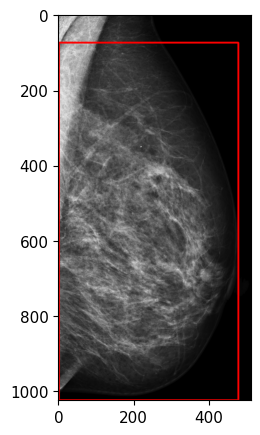

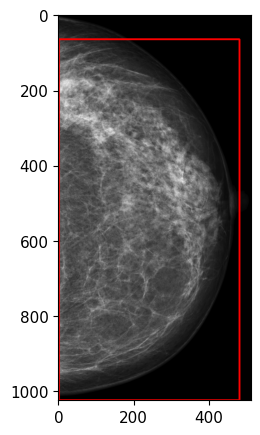

In [114]:
#check some data
recognized = train_csv[~train_csv['ROI'].isnull()].iloc[40:45,:]

for data in tqdm(recognized.itertuples(), total=len(recognized)):
    img = read_png_img(train_images_folder_png_768, str(data.patient_id), str(data.image_id))
    show_image_and_ROI(img,data.ROI)

In [88]:
#check unrecognized data
unrecognized = train_csv[train_csv['ROI'].isnull()]
display(unrecognized)

for data in tqdm(unrecognized.itertuples(), total=len(unrecognized)):
    img = read_png_img(train_images_folder_png_768, str(data.patient_id), str(data.image_id))
    show_image(img)

,patient_id,image_id,ROI


0it [00:00, ?it/s]

## Extract ROIs

  0%|          | 0/1 [00:00<?, ?it/s]

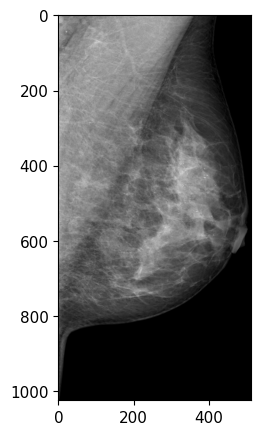

(1024, 512, 3)
{'xmin': 4.3489990234375, 'xmax': 494.21142578125, 'ymin': 63.096412658691406, 'ymax': 840.5491943359375}
xmax increased!!!
{'xmin': 3, 'xmax': 472, 'ymin': 84, 'ymax': 1023}


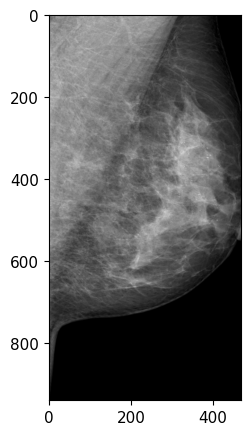

(940, 470, 3)


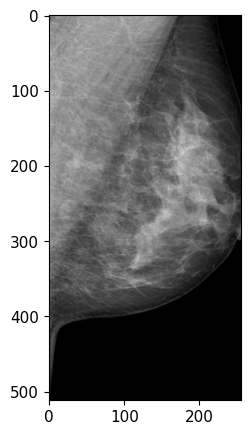

(512, 256, 3)


In [104]:
#Crop ROIs from some dcms and check the results

to_crop = train_csv
if(Config['skip_unrecognized']):
    to_crop = to_crop[~to_crop['ROI'].isnull()]
else:
    to_crop.loc[to_crop['ROI'].isnull(),'ROI'] = {'xmin':0,'xmax':np.Inf,'ymin':0,'ymax':np.Inf}

for data in tqdm(to_crop.iloc[5:6,:].itertuples(), total=len(to_crop.iloc[10:11,:])):
    img = read_png_img(train_images_folder, str(data.patient_id), str(data.image_id))
    show_image(img)
    print(img.shape)

    y_orig, x_orig = img.shape[:2]
    x_orig, y_orig = x_orig-1, y_orig-1
    k_x, k_y = float(x_orig)/767.0, float(y_orig)/767.0

    print(data.ROI)
    #resize ROI coordinates
    ROI_resized={}
    ROI_resized['xmin'] = np.clip(round(k_x * data.ROI['xmin']), 0, x_orig)
    ROI_resized['xmax'] = np.clip(round(k_x * data.ROI['xmax']), 0, x_orig)
    ROI_resized['ymin'] = np.clip(round(k_y * data.ROI['ymin']), 0, y_orig)
    ROI_resized['ymax'] = np.clip(round(k_y * data.ROI['ymax']), 0, y_orig)


    if(Config['avoid_stretches']):
        #how many times one size can be less then other
        size_threshold = Config['output_dim_y'] / Config['output_dim_x']

        x_distance = ROI_resized['xmax']-ROI_resized['xmin']
        y_distance = ROI_resized['ymax']-ROI_resized['ymin']

        #params to calculate y coords
        y_distance_threshold = 3

        if((x_distance) < (y_distance)/size_threshold):
            right_distance = x_orig - ROI_resized['xmax']
            left_distance = ROI_resized['xmin'] - 0
            min_x_range_value = int((y_distance)/size_threshold)

            #find the side where breast located
            #and increase x ROI value on the opposite side
            if(left_distance<right_distance):
                print("xmax increased!!!")
                ROI_resized['xmax'] = ROI_resized['xmin'] + min_x_range_value
                ROI_resized['xmax'] = np.clip(ROI_resized['xmax'], 0, x_orig)
            elif(right_distance<left_distance):
                print("xmin increased!!!")
                ROI_resized['xmin'] = ROI_resized['xmax'] - min_x_range_value
                ROI_resized['xmin'] = np.clip(ROI_resized['xmin'], 0, x_orig)

        elif((y_distance) < (x_distance)*size_threshold):
            top_distance = y_orig - ROI_resized['ymax']
            bottom_distance = ROI_resized['ymin'] - 0
            min_y_range_value = int((x_distance)*size_threshold)

            #if one of the y coordinates is much closer to img border increase opposite side
            if(bottom_distance<top_distance/y_distance_threshold):
                print("ymax increased!!!")
                ROI_resized['ymax'] = ROI_resized['ymin'] + min_y_range_value
                ROI_resized['ymax'] = np.clip(ROI_resized['ymax'], 0, y_orig)
            elif(top_distance<bottom_distance/y_distance_threshold):
                print("ymin increased!!!")
                ROI_resized['ymin'] = ROI_resized['ymax'] - min_y_range_value
                ROI_resized['ymin'] = np.clip(ROI_resized['ymin'], 0, y_orig)
            #else change both y and clip
            else:
                print("both y increased!!!")
                ymin, ymax = ROI_resized['ymin'], ROI_resized['ymax']
                y_dist = ymax - ymin
                y_dist_add = (min_y_range_value - y_dist)//2

                ROI_resized['ymin'] = ymin - y_dist_add
                ROI_resized['ymax'] = ymax + y_dist_add
                ROI_resized['ymin'] = np.clip(ROI_resized['ymin'], 0, y_orig)
                ROI_resized['ymax'] = np.clip(ROI_resized['ymax'], 0, y_orig)

    print(ROI_resized)

    ROI_img = img[ROI_resized['ymin']:ROI_resized['ymax']+1,ROI_resized['xmin']:ROI_resized['xmax']+1]
    show_image(ROI_img)
    print(ROI_img.shape)

    if(Config['skip_small_ROIs']):
        size_threshold = 16
        min_size_x = Config['output_dim_x']/size_threshold
        min_size_y = Config['output_dim_y']/size_threshold

        if(ROI_img.shape[0]<min_size_y or ROI_img.shape[1]<min_size_x):
            print('Skipped: ',data.patient_id,data.image_id)
            show_image(ROI_img)
            continue

    #ROI resizing
    ROI_img = cv2.resize(ROI_img, (Config['output_dim_x'], Config['output_dim_y']))
    show_image(ROI_img)
    print(ROI_img.shape)

In [102]:
def process(data, output_folder):
    img = read_png_img(train_images_folder, str(data.patient_id), str(data.image_id))
    y_orig, x_orig = img.shape[:2]
    x_orig, y_orig = x_orig-1, y_orig-1
    k_x, k_y = float(x_orig)/767.0, float(y_orig)/767.0

    #resize ROI coordinates
    ROI_resized={}
    ROI_resized['xmin'] = np.clip(round(k_x * data.ROI['xmin']), 0, x_orig)
    ROI_resized['xmax'] = np.clip(round(k_x * data.ROI['xmax']), 0, x_orig)
    ROI_resized['ymin'] = np.clip(round(k_y * data.ROI['ymin']), 0, y_orig)
    ROI_resized['ymax'] = np.clip(round(k_y * data.ROI['ymax']), 0, y_orig)


    if(Config['avoid_stretches']):
        #how many times one size can be less then other
        size_threshold = Config['output_dim_y'] / Config['output_dim_x']

        x_distance = ROI_resized['xmax']-ROI_resized['xmin']
        y_distance = ROI_resized['ymax']-ROI_resized['ymin']

        #params to calculate y coords
        y_distance_threshold = 3

        if((x_distance) < (y_distance)/size_threshold):
            right_distance = x_orig - ROI_resized['xmax']
            left_distance = ROI_resized['xmin'] - 0
            min_x_range_value = int((y_distance)/size_threshold)

            #find the side where breast located
            #and increase x ROI value on the opposite side
            if(left_distance<right_distance):
                ROI_resized['xmax'] = ROI_resized['xmin'] + min_x_range_value
                ROI_resized['xmax'] = np.clip(ROI_resized['xmax'], 0, x_orig)
            elif(right_distance<left_distance):
                ROI_resized['xmin'] = ROI_resized['xmax'] - min_x_range_value
                ROI_resized['xmin'] = np.clip(ROI_resized['xmin'], 0, x_orig)

        elif((y_distance) < (x_distance)*size_threshold):
            top_distance = y_orig - ROI_resized['ymax']
            bottom_distance = ROI_resized['ymin'] - 0
            min_y_range_value = int((x_distance)*size_threshold)

            #if one of the y coordinates is much closer to img border increase opposite side
            if(bottom_distance<top_distance/y_distance_threshold):
                ROI_resized['ymax'] = ROI_resized['ymin'] + min_y_range_value
                ROI_resized['ymax'] = np.clip(ROI_resized['ymax'], 0, y_orig)
            elif(top_distance<bottom_distance/y_distance_threshold):
                ROI_resized['ymin'] = ROI_resized['ymax'] - min_y_range_value
                ROI_resized['ymin'] = np.clip(ROI_resized['ymin'], 0, y_orig)
            #else change both y and clip
            else:
                ymin, ymax = ROI_resized['ymin'], ROI_resized['ymax']
                y_dist = ymax - ymin
                y_dist_add = (min_y_range_value - y_dist)//2

                ROI_resized['ymin'] = ymin - y_dist_add
                ROI_resized['ymax'] = ymax + y_dist_add
                ROI_resized['ymin'] = np.clip(ROI_resized['ymin'], 0, y_orig)
                ROI_resized['ymax'] = np.clip(ROI_resized['ymax'], 0, y_orig)


    ROI_img = img[ROI_resized['ymin']:ROI_resized['ymax']+1,ROI_resized['xmin']:ROI_resized['xmax']+1]

    if(Config['skip_small_ROIs']):
        size_threshold = 16
        min_size_x = Config['output_dim_x']/size_threshold
        min_size_y = Config['output_dim_y']/size_threshold

        if(ROI_img.shape[0]<min_size_y or ROI_img.shape[1]<min_size_x):
            return {'patient_id':data.patient_id,'image_id':data.image_id}

    #ROI resizing
    ROI_img = cv2.resize(ROI_img, (Config['output_dim_x'], Config['output_dim_y']))
    cv2.imwrite(os.path.join(output_folder, f'{data.patient_id}_{data.image_id}.{Config["output_extension"]}'), ROI_img)
    return None

In [105]:
#save ROIs

to_save = train_csv
if(Config['skip_unrecognized']):
    to_save = to_save[~to_save['ROI'].isnull()]
else:
    to_save.loc[to_save['ROI'].isnull(),'ROI'] = {'xmin':0,'xmax':np.Inf,'ymin':0,'ymax':np.Inf}

output_folder = '/content/output_roi_images'
os.makedirs(output_folder, exist_ok = True)
small_ROIs = Parallel(n_jobs=-1)(
    delayed(process)(data, output_folder)
    for data in tqdm(to_save.itertuples(), total=len(to_save))
)

  0%|          | 0/100 [00:00<?, ?it/s]

In [106]:
small_ROIs = [x for x in small_ROIs if x is not None]
small_ROIs = pd.DataFrame(small_ROIs)
small_ROIs

,patient_id,image_id
0,31234,861645945


In [107]:
#save all unrecognized data to csv
unrecognized = train_csv[train_csv['ROI'].isnull()][['patient_id','image_id']]
display(unrecognized)

unrecognized_images = pd.concat([small_ROIs,unrecognized]).reset_index(drop=True)
if(len(unrecognized_images)>0):
    unrecognized_images.to_csv('unrecognized_images.csv')
unrecognized_images

,patient_id,image_id


,patient_id,image_id
0,31234,861645945
